In [1]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
from fetch_kline import fetch_kline_price_data
from get_direction import get_direction
from backtesting import backtesting
from plot_chart import plot_chart
from process_results import process_results
from calc_metrics import calc_metrics

ticker = 'BTCUSDT'
time_interval = '15m'
start_date = '2023-01-01'
end_date = '2024-06-09'
filename = f'BTCUSDT_historical_data_{start_date}_to_{end_date}.csv'
turning_pct = 0.05
atr_mode = True
chart_type = 'OHLC'
start_filter_date = '2023-01-01 00:00:00'
end_filter_date = '2024-06-09 10:15:00'

In [2]:

df = fetch_kline_price_data(ticker=ticker, time_interval=time_interval, start_date=start_date, filename=filename)

2023-01-01 00:00:00
2023-01-16 14:59:59.999000
2023-02-01 05:59:59.999000
2023-02-16 20:59:59.999000
2023-03-04 11:59:59.999000
2023-03-20 02:59:59.999000
2023-04-04 17:59:59.999000
2023-04-20 08:59:59.999000
2023-05-05 23:59:59.999000
2023-05-21 14:59:59.999000
2023-06-06 05:59:59.999000
2023-06-21 20:59:59.999000
2023-07-07 11:59:59.999000
2023-07-23 02:59:59.999000
2023-08-07 17:59:59.999000
2023-08-23 08:59:59.999000
2023-09-07 23:59:59.999000
2023-09-23 14:59:59.999000
2023-10-09 05:59:59.999000
2023-10-24 20:59:59.999000
2023-11-09 11:59:59.999000
2023-11-25 02:59:59.999000
2023-12-10 17:59:59.999000
2023-12-26 08:59:59.999000
2024-01-10 23:59:59.999000
2024-01-26 14:59:59.999000
2024-02-11 05:59:59.999000
2024-02-26 20:59:59.999000
2024-03-13 11:59:59.999000
2024-03-29 02:59:59.999000
2024-04-13 17:59:59.999000
2024-04-29 08:59:59.999000
2024-05-14 23:59:59.999000
2024-05-30 14:59:59.999000
2024-06-15 05:59:59.999000


In [3]:

df['date'] = pd.to_datetime(df['Open time'])
df = df[(df['date'] >= start_filter_date) & (df['date'] < end_filter_date)]
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'atr']
df['atr'] = ta.atr(df['high'], df['low'], df['close'], length=14)
df = df[df['atr'].notna()]
df['atr'] = df['atr'] * 3
df = df.reset_index(drop=True)
df.head()

,date,open,high,low,close,volume,atr
0,2023-01-01 03:30:00,16523.8,16531.8,16523.5,16529.4,432.007,45.113884
1,2023-01-01 03:45:00,16529.3,16532.3,16526.0,16529.3,412.820,42.323285
2,2023-01-01 04:00:00,16529.2,16530.4,16520.2,16520.2,574.594,41.117517
3,2023-01-01 04:15:00,16520.2,16523.6,16512.0,16513.6,1166.501,40.487541
4,2023-01-01 04:30:00,16513.5,16519.8,16512.4,16517.1,631.058,38.714099


In [4]:

df, tops, bottoms = get_direction(df, turning_pct, atr_mode, chart_type)
directions = df['direction']
df.head()

,date,open,high,low,close,volume,atr,direction
0,2023-01-01 03:30:00,16523.8,16531.8,16523.5,16529.4,432.007,45.113884,up
1,2023-01-01 03:45:00,16529.3,16532.3,16526.0,16529.3,412.820,42.323285,up
2,2023-01-01 04:00:00,16529.2,16530.4,16520.2,16520.2,574.594,41.117517,up
3,2023-01-01 04:15:00,16520.2,16523.6,16512.0,16513.6,1166.501,40.487541,up
4,2023-01-01 04:30:00,16513.5,16519.8,16512.4,16517.1,631.058,38.714099,up


In [5]:

df, balance = backtesting(df, directions, turning_pct, atr_mode, chart_type)
print("Final Balance:", balance)
df.head()

Final Balance: 310538.5417104103


,date,open,high,low,close,volume,atr,direction,signal,buy signal,buy position,sell signals,sell position,entry price,exit price,PnL
0,2023-01-01 03:30:00,16523.8,16531.8,16523.5,16529.4,432.007,45.113884,up,0,0,None,0,None,NaN,NaN,NaN
1,2023-01-01 03:45:00,16529.3,16532.3,16526.0,16529.3,412.820,42.323285,up,0,0,None,0,None,NaN,NaN,NaN
2,2023-01-01 04:00:00,16529.2,16530.4,16520.2,16520.2,574.594,41.117517,up,0,0,None,0,None,NaN,NaN,NaN
3,2023-01-01 04:15:00,16520.2,16523.6,16512.0,16513.6,1166.501,40.487541,up,0,0,None,0,None,NaN,NaN,NaN
4,2023-01-01 04:30:00,16513.5,16519.8,16512.4,16517.1,631.058,38.714099,up,0,0,None,0,None,NaN,NaN,NaN


In [6]:

processed_df = process_results(df)
processed_df.head()

,entry_date,entry_price,exit_date,exit_price,PnL,Balance,Cum_PnL
0,2023-01-01 08:45:00,16504.2,2023-01-01 09:45:00,16532.7,-28.500000,99971.500000,-28.500000
1,2023-01-01 10:00:00,16536.9,2023-01-01 14:30:00,16540.5,3.600000,99975.100000,-24.900000
2,2023-01-01 14:45:00,16533.1,2023-01-01 16:00:00,16554.8,-35.779046,99939.320954,-60.679046
3,2023-01-01 16:15:00,16572.2,2023-01-02 00:45:00,16578.0,5.800000,99945.120954,-54.879046
4,2023-01-02 01:00:00,16558.5,2023-01-02 03:15:00,16575.9,-17.400000,99927.720954,-72.279046


In [7]:

metrics_df = calc_metrics(processed_df)
metrics_df

,Sharpe Ratio,Win Rate,Profit Factor,Average RRR,Expectancy,Final Balance,Total Trades Number,Maximum Drawdown
0,3.370648,0.456645,2.07848,2.473155,99.26381,310538.54171,2122,0.016555


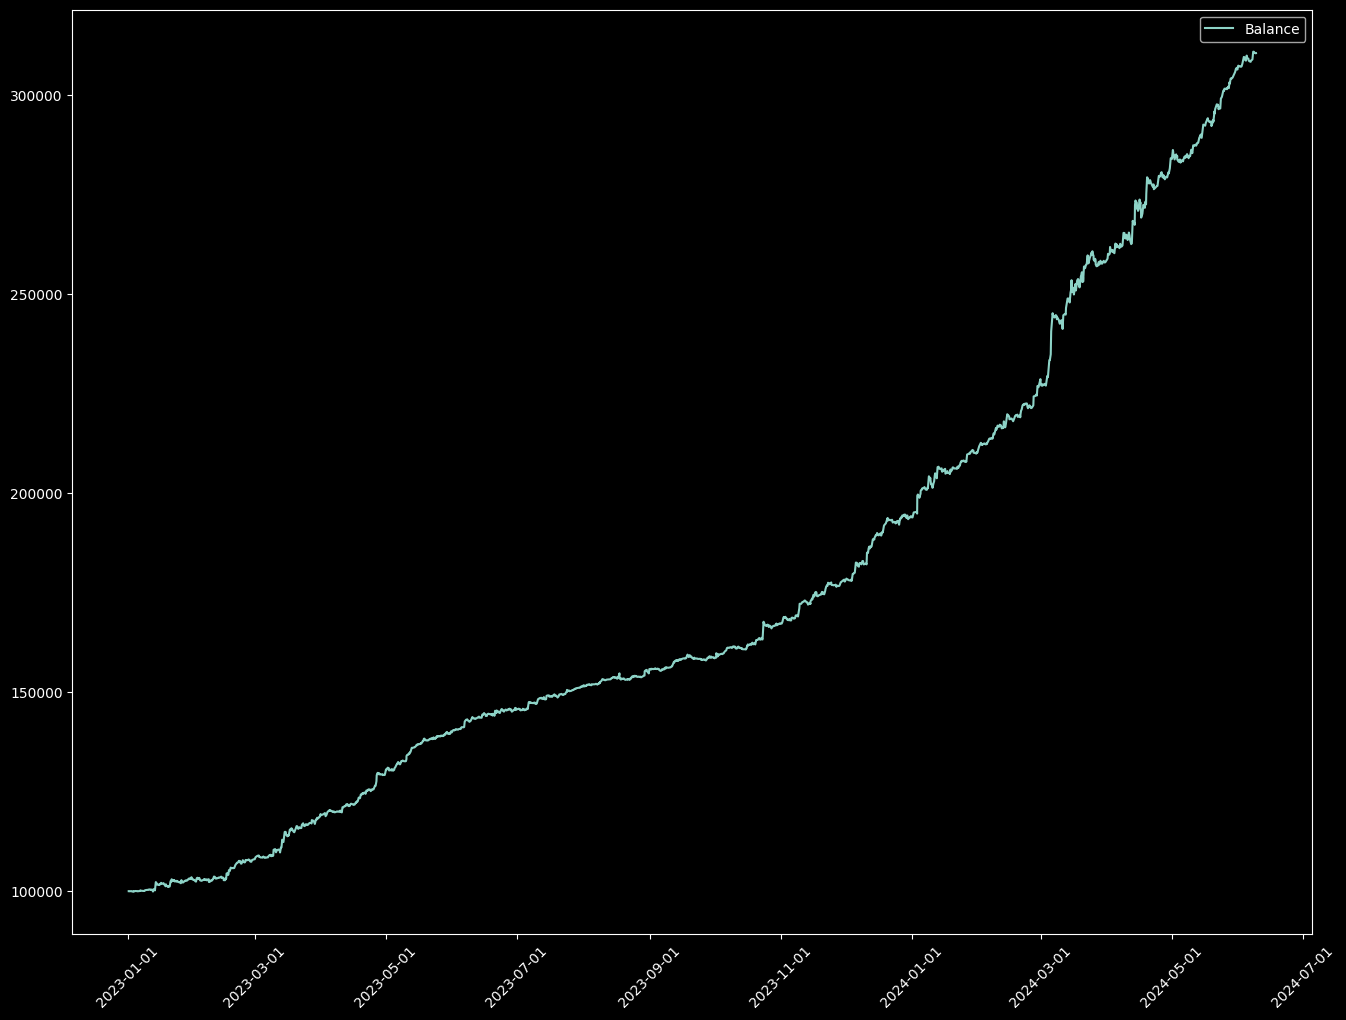

In [8]:

fig, ax = plot_chart(processed_df)
plt.show()

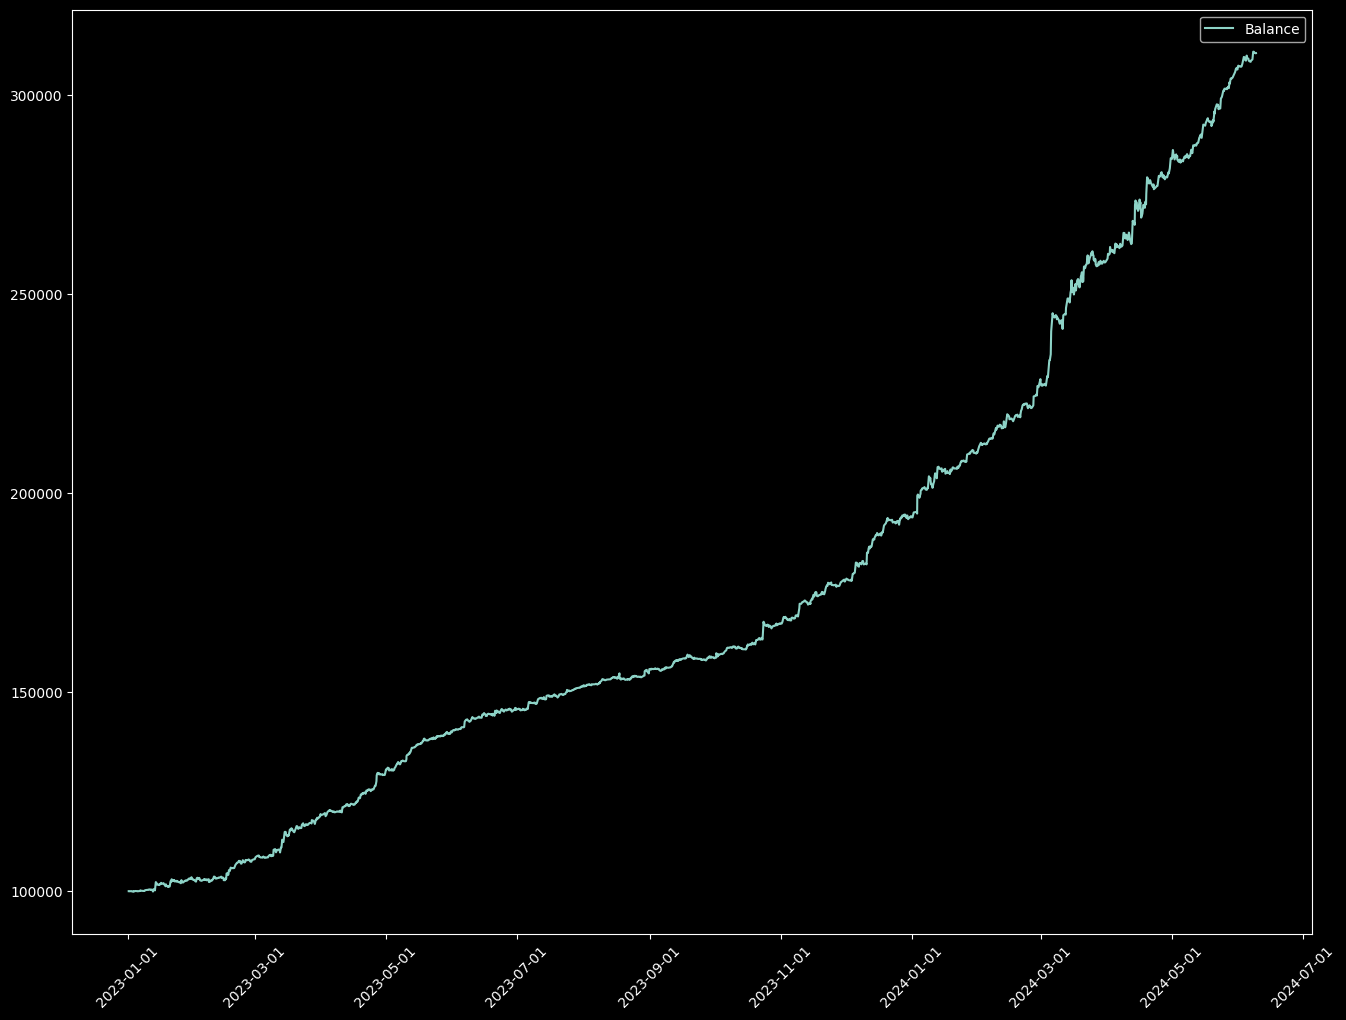

In [9]:

fig, ax = plot_chart(processed_df)
plt.show()